In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns
#Plotly
import plotly
# import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=True)

In [28]:

dataset = pd.read_csv('1995-2013.csv', engine='python')

In [29]:
dataset.head()

,d,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,199601030022,1996,1,3,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,199601050017,1996,1,5,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
2,199601200012,1996,1,20,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
3,199601210006,1996,1,21,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
4,199601240008,1996,1,24,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


# Cleaninng data removing nulls 

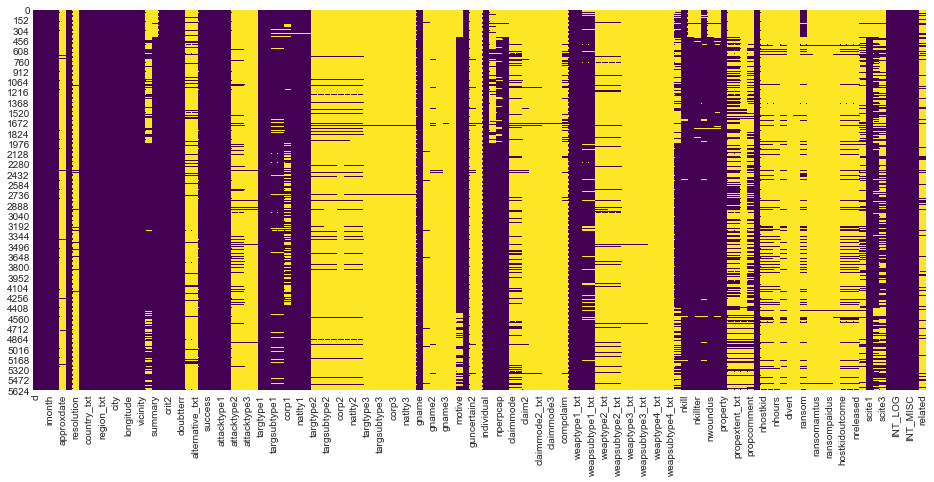

In [30]:
plt.figure(figsize=(16,7))
sns.heatmap(dataset.isnull(),cmap='viridis',cbar=False)

In [31]:
dataset=dataset[['d','iyear', 'imonth', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 'nwound']]

In [47]:
dataset.rename(columns={'imonth': 'Month',
                        'id':'Event ID',
 'iyear': 'Year',
 'eventid': 'Event ID',
 'country_txt': 'Country',
 'region_txt': 'Region',
 'provstate': 'State',
 'city': 'City',
 'attacktype1_txt': 'Attack type',
 'targtype1_txt': 'Target',
 'natlty1_txt': 'Nationality',
 'gname': 'Terrorist Group',
 'weaptype1_txt': 'Weapon type',
 'weapsubtype1_txt': 'Weapon subtype',
 'nkill': 'Killed',
 'nwound': 'Wounded'},inplace=True)

In [48]:
dataset.head()

,d,Year,Month,Country,Region,State,City,latitude,longitude,success,Attack type,Target,Nationality,Terrorist Group,Weapon type,Weapon subtype,Killed,Wounded,Casualties
0,199601030022,1996,1,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1,Bombing/Explosion,Private Citizens & Property,India,Jammu and Kashmir Islamic Front,Explosives,Vehicle,13.0,38.0,51.0
1,199601050017,1996,1,India,South Asia,Jammu and Kashmir,Barshala,33.201410,75.646993,1,Armed Assault,Private Citizens & Property,India,Unknown,Firearms,Unknown Gun Type,15.0,0.0,15.0
2,199601200012,1996,1,India,South Asia,Bihar,Gaya,24.781467,84.986412,1,Armed Assault,Police,India,Unknown,Incendiary,No Record,7.0,0.0,7.0
3,199601210006,1996,1,India,South Asia,Jammu and Kashmir,Desapani,33.778175,76.576171,1,Armed Assault,Police,India,Separatists,Firearms,Unknown Gun Type,7.0,11.0,18.0
4,199601240008,1996,1,India,South Asia,Jammu and Kashmir,Srinagar,34.083740,74.789902,1,Assassination,Government (General),India,Separatists,Firearms,Unknown Gun Type,1.0,0.0,1.0


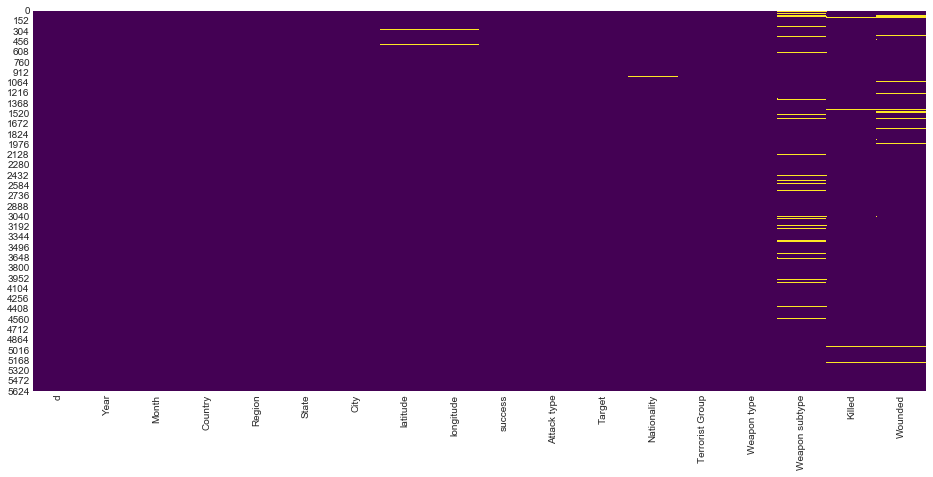

In [34]:
plt.figure(figsize=(16,7))
sns.heatmap(dataset.isnull(),cmap='viridis',cbar=False)

In [35]:
dataset['Weapon subtype'].fillna('No Record',inplace = True)
dataset['Nationality'].fillna('Unknown', inplace = True)
dataset.dropna(inplace = True)

In [36]:
dataset['Casualties'] = dataset['Killed']+dataset['Wounded']

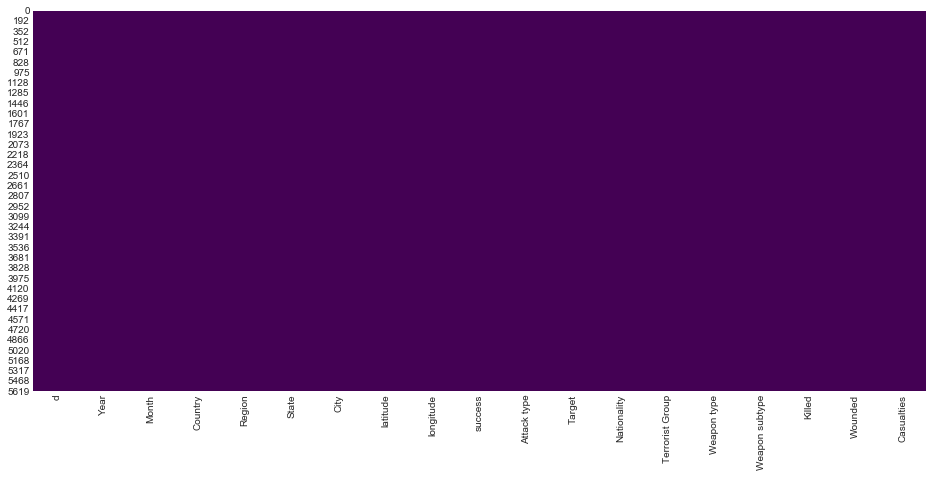

In [37]:
plt.figure(figsize=(16,7))
sns.heatmap(dataset.isnull(),cmap='viridis',cbar=False)

# Working with Indian data

In [39]:
India = dataset[dataset['Country']=='India']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

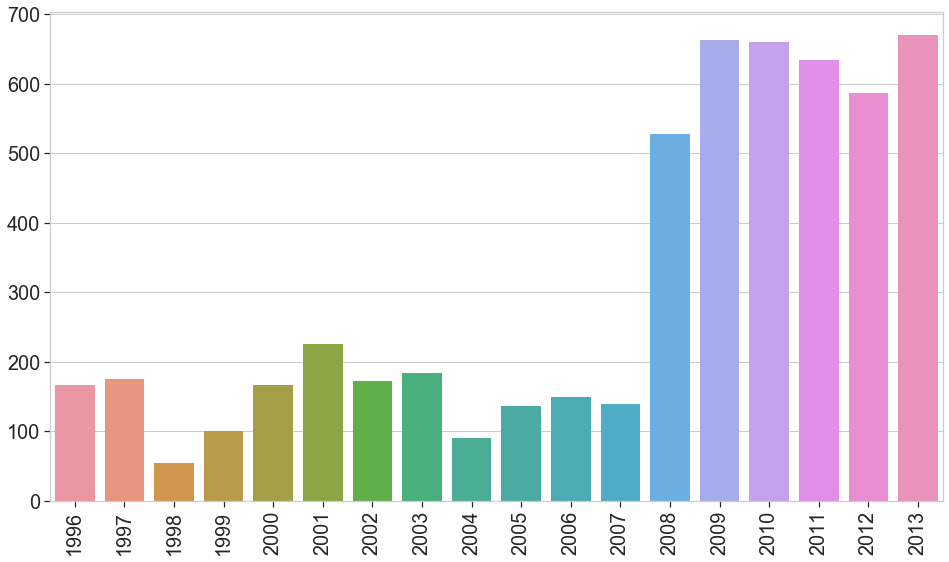

In [40]:
Attack_counts = India.Year.value_counts()
sns.set_context(context='notebook',font_scale=1.8)
plt.figure(figsize=(16,9))
sns.barplot(Attack_counts.index, Attack_counts.values)
plt.xticks(rotation=90)

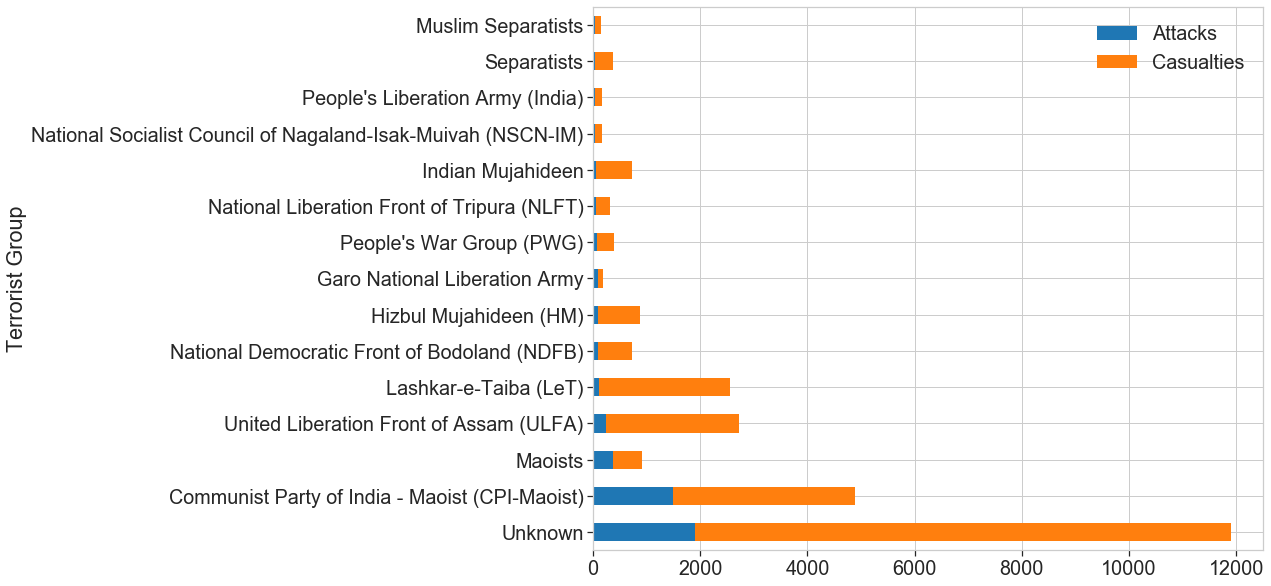

In [41]:
filter =India[India['Terrorist Group'].isin(India['Terrorist Group'].value_counts()[0:15].index)][['Casualties','Terrorist Group']].groupby('Terrorist Group').sum().reset_index().merge(India[India['Terrorist Group'].isin(India['Terrorist Group'].value_counts()[0:15].index)]['Terrorist Group'].value_counts().to_frame().reset_index().rename(columns={'index':'Terrorist Group','Terrorist Group':'Attacks'}), on='Terrorist Group').sort_values(by='Attacks',ascending=False)
filter.plot.barh(x='Terrorist Group',y=['Attacks','Casualties'],figsize=(12,10),stacked=True)

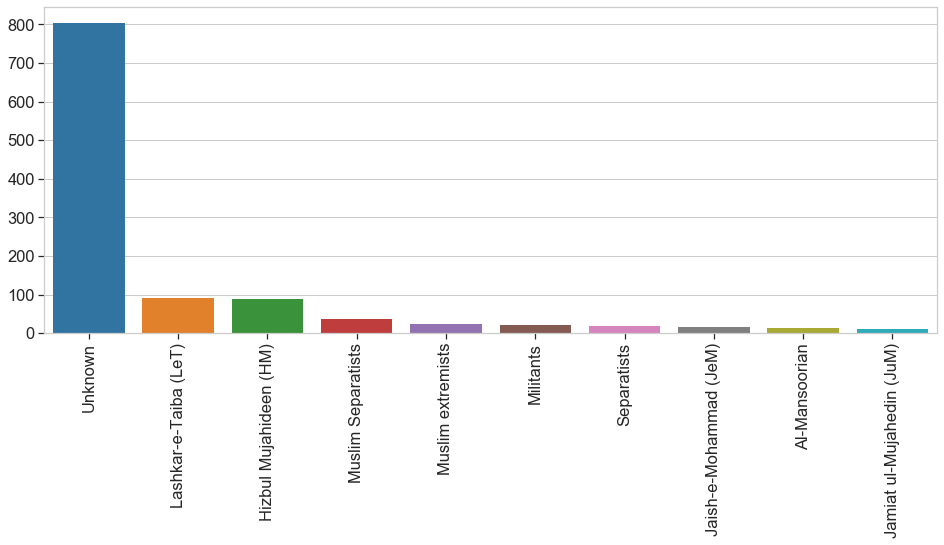

In [42]:
filter = India[India['State']=='Jammu and Kashmir']['Terrorist Group'].value_counts()[0:10]
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.barplot(filter.index, filter.values)

Text(0, 0.5, 'Attacks')

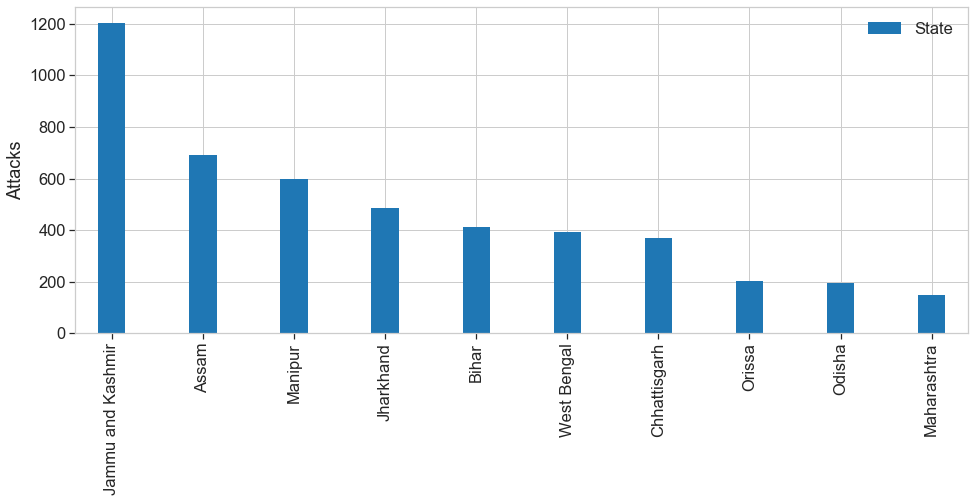

In [43]:
India['State'].value_counts()[0:10].to_frame().plot.bar(figsize=(16,6),width=0.3)
plt.ylabel('Attacks')

In [46]:
India.head()

,d,Year,Month,Country,Region,State,City,latitude,longitude,success,Attack type,Target,Nationality,Terrorist Group,Weapon type,Weapon subtype,Killed,Wounded,Casualties
0,199601030022,1996,1,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1,Bombing/Explosion,Private Citizens & Property,India,Jammu and Kashmir Islamic Front,Explosives,Vehicle,13.0,38.0,51.0
1,199601050017,1996,1,India,South Asia,Jammu and Kashmir,Barshala,33.201410,75.646993,1,Armed Assault,Private Citizens & Property,India,Unknown,Firearms,Unknown Gun Type,15.0,0.0,15.0
2,199601200012,1996,1,India,South Asia,Bihar,Gaya,24.781467,84.986412,1,Armed Assault,Police,India,Unknown,Incendiary,No Record,7.0,0.0,7.0
3,199601210006,1996,1,India,South Asia,Jammu and Kashmir,Desapani,33.778175,76.576171,1,Armed Assault,Police,India,Separatists,Firearms,Unknown Gun Type,7.0,11.0,18.0
4,199601240008,1996,1,India,South Asia,Jammu and Kashmir,Srinagar,34.083740,74.789902,1,Assassination,Government (General),India,Separatists,Firearms,Unknown Gun Type,1.0,0.0,1.0


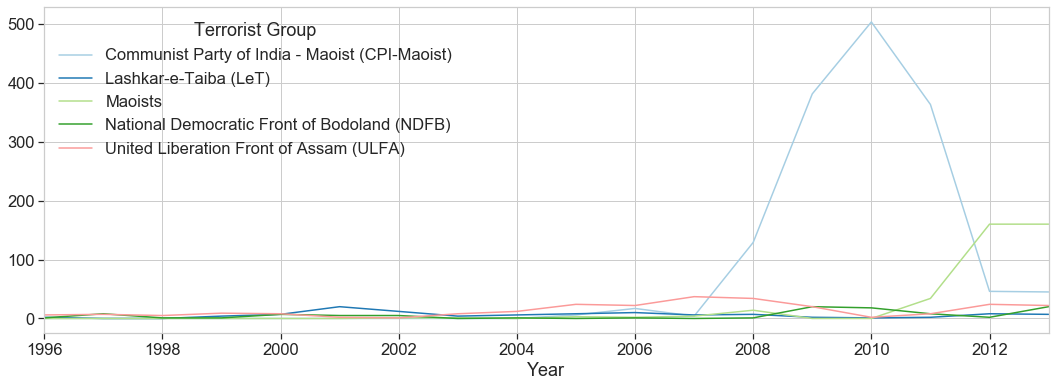

In [70]:
pd.crosstab(India[India['Terrorist Group'].isin(India['Terrorist Group'].value_counts()[1:6].index)]['Year'],India[India['Terrorist Group'].isin(India['Terrorist Group'].value_counts()[1:6].index)]['Terrorist Group']).plot(color=sns.color_palette('Paired',10),figsize=(18,6))

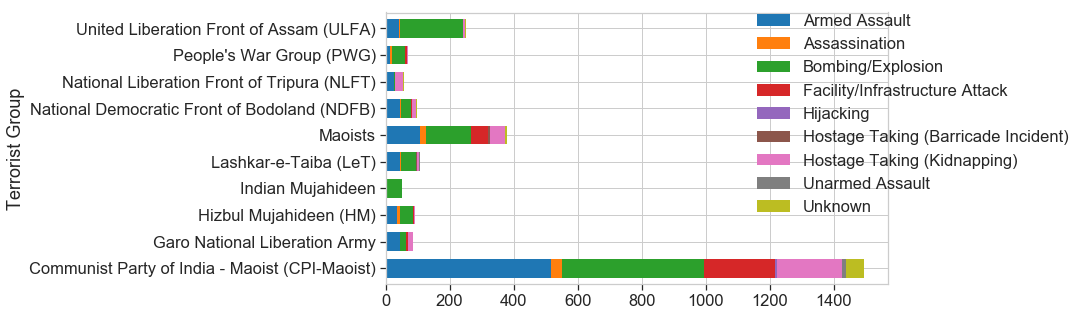

In [71]:
v1=India[India['Terrorist Group'].isin(India['Terrorist Group'].value_counts()[1:11].index)]
pd.crosstab(v1['Terrorist Group'],v1['Attack type']).plot.barh(stacked=True,figsize=(9,5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.05,1.05))